In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('day.csv')

In [17]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
skewed = data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].skew()

In [7]:
skewed = skewed[abs(skewed) > 1]
print("Skewed Columns:\n", skewed)

Skewed Columns:
 casual    1.266454
dtype: float64


Log Transformation

In [9]:
import numpy as np

In [10]:
df_log = data.copy()
for col in skewed.index:
    df_log[col] = np.log(df_log[col] + 1)

Square Root Transformation

In [11]:
df_sqrt = data.copy()
for col in skewed.index:
    df_sqrt[col] = np.sqrt(df_sqrt[col])

Box-Cox Transformation

In [12]:
from scipy.stats import boxcox

In [13]:
df_boxcox = data.copy()
for col in skewed.index:
    df_boxcox[col], _ = boxcox(df_boxcox[col] + 1)

Evaluate Transformations

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ANACONDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


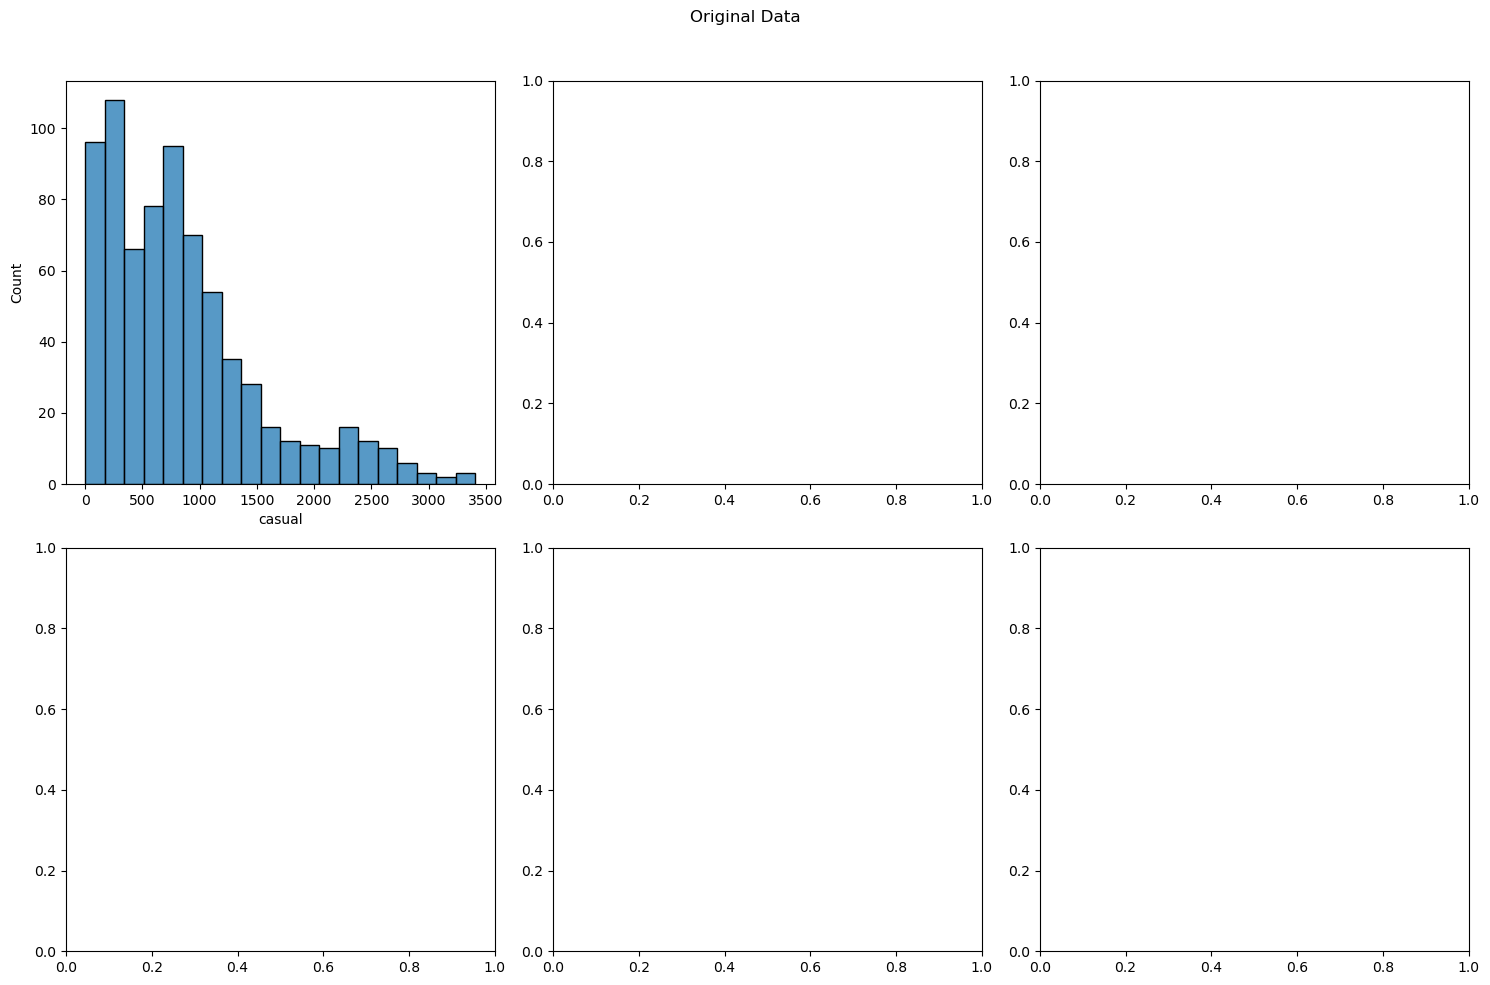

C:\ANACONDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


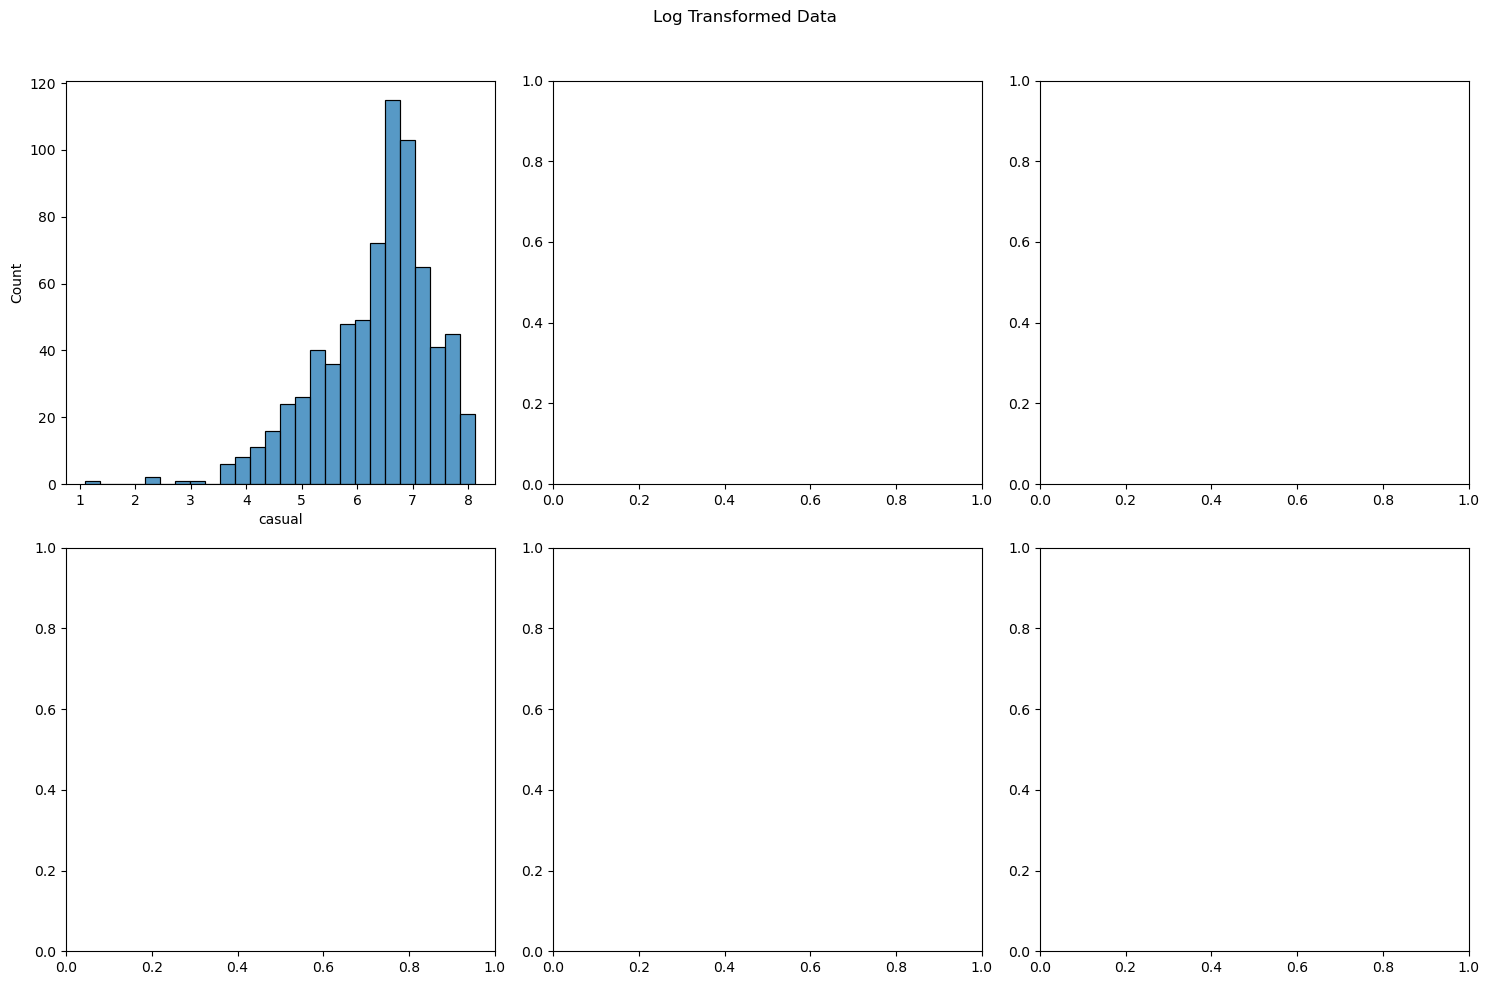

C:\ANACONDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


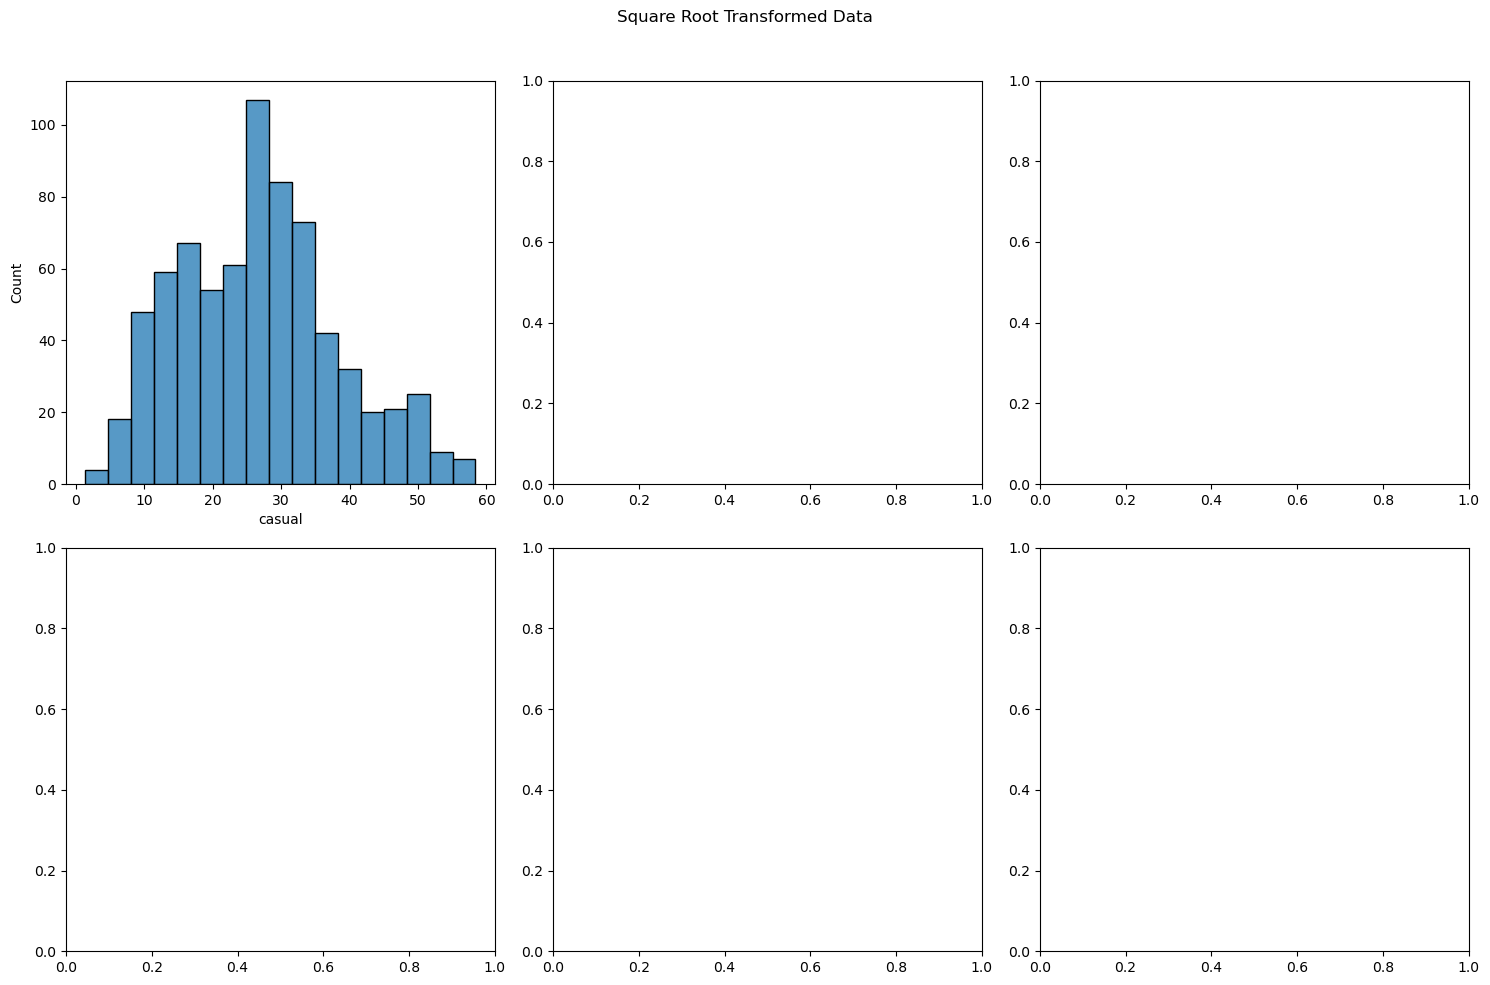

C:\ANACONDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


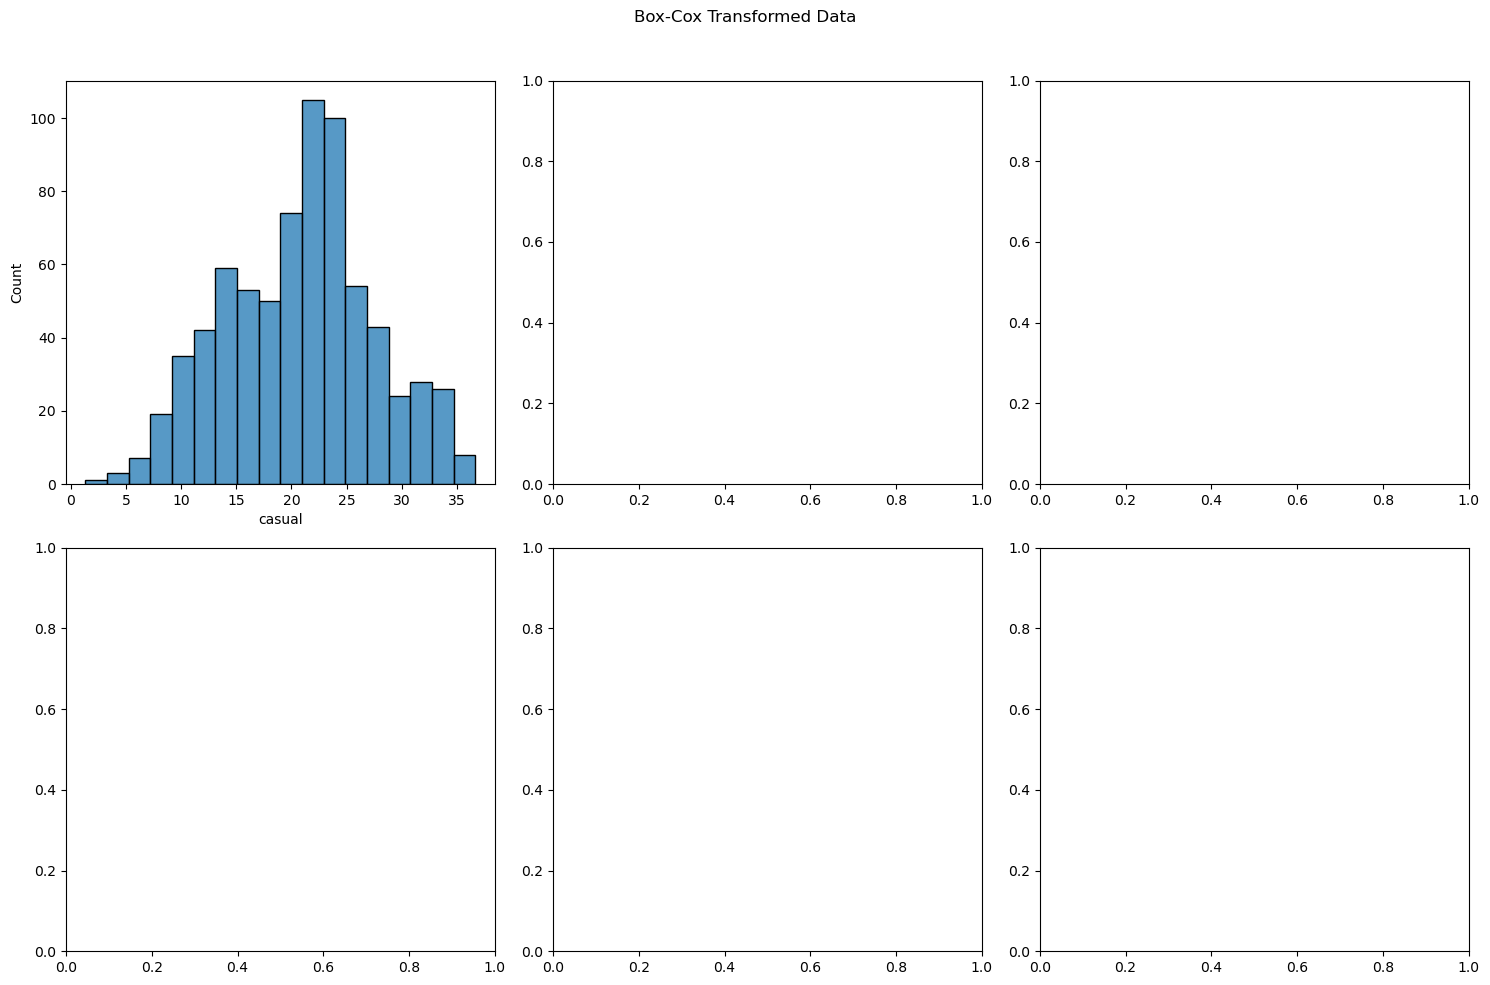

In [16]:
def plot_histograms(data, title):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(title)
    for i, col in enumerate(skewed.index):
        sns.histplot(data[col], ax=axes[i//3, i%3])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


plot_histograms(data, 'Original Data')
plot_histograms(df_log, 'Log Transformed Data')
plot_histograms(df_sqrt, 'Square Root Transformed Data')
plot_histograms(df_boxcox, 'Box-Cox Transformed Data')